In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score


In [4]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Depi\Heart_Disease_Project\data\heart_disease_clean.csv")

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


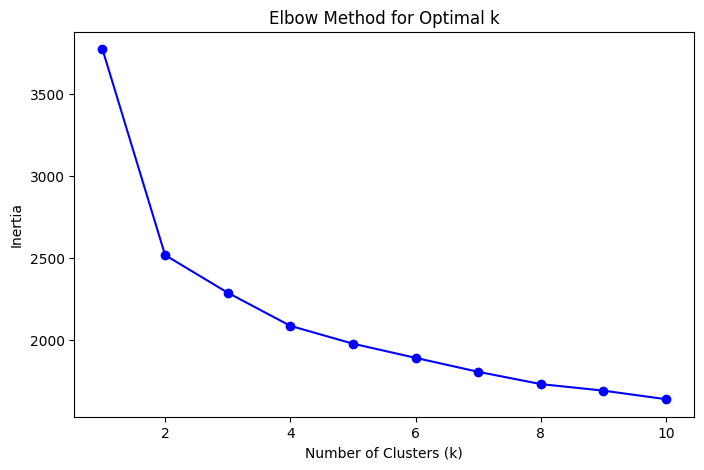

K-Means Clustering Evaluation:
ARI: 0.21292368206070095
AMI: 0.1513164549096302


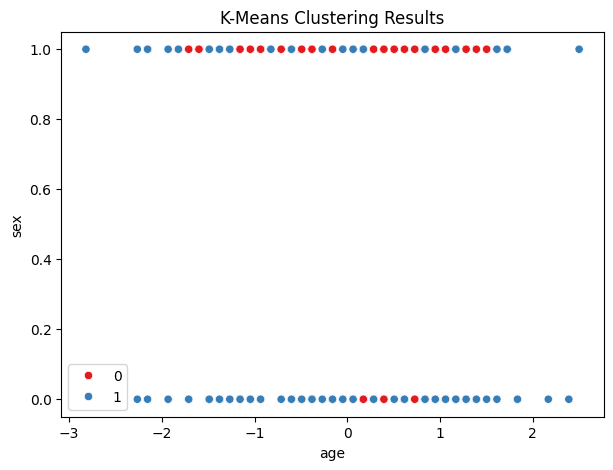

In [6]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Let's assume optimal k = 2 (since disease target is usually binary, adjust if needed)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Compare with actual labels
print("K-Means Clustering Evaluation:")
print("ARI:", adjusted_rand_score(y, kmeans_labels))
print("AMI:", adjusted_mutual_info_score(y, kmeans_labels))

# Visualization (first 2 features for simplicity)
plt.figure(figsize=(7,5))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=kmeans_labels, palette='Set1')
plt.title("K-Means Clustering Results")
plt.show()

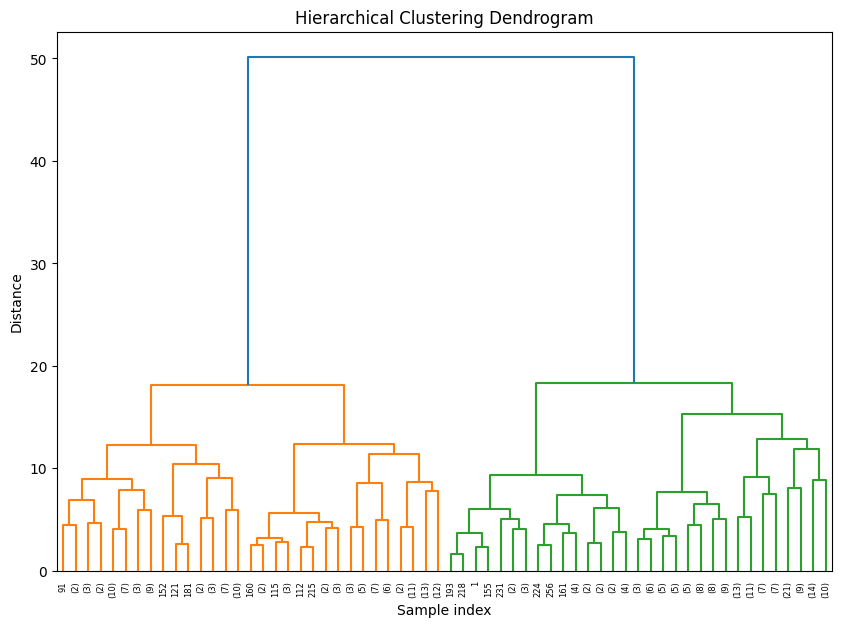

Hierarchical Clustering Evaluation:
ARI: 0.21292368206070095
AMI: 0.15131645490963017


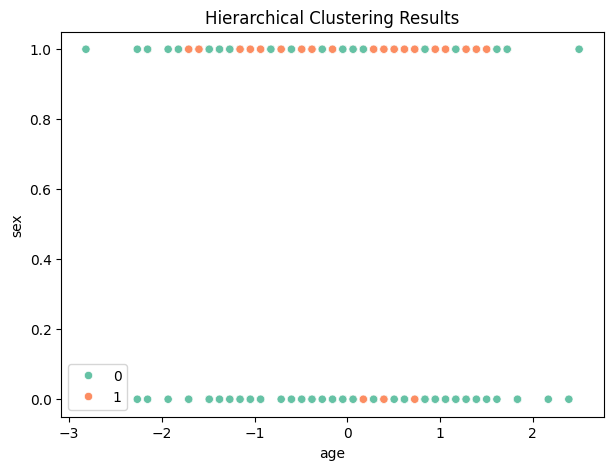

In [7]:
plt.figure(figsize=(10,7))
Z = linkage(X, method='ward')
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative Clustering
hier_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
hier_labels = hier_cluster.fit_predict(X)

# Compare with actual labels
print("Hierarchical Clustering Evaluation:")
print("ARI:", adjusted_rand_score(y, hier_labels))
print("AMI:", adjusted_mutual_info_score(y, hier_labels))

# Visualization
plt.figure(figsize=(7,5))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=hier_labels, palette='Set2')
plt.title("Hierarchical Clustering Results")
plt.show()